## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
df_train = pd.read_csv(
    "C:/Users/mctal/Documents/DSBA materials/6 Model Tuning/Train.csv"
)
df_test = pd.read_csv("C:/Users/mctal/Documents/DSBA materials/6 Model Tuning/Test.csv")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


<IPython.core.display.Javascript object>

- train dataset loaded correctly

In [4]:
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


<IPython.core.display.Javascript object>

- test dataset loaded correctly

In [5]:
df_train.shape

(20000, 41)

<IPython.core.display.Javascript object>

- There are 20,000 rows and 41 columns in the train dataset

In [6]:
df_test.shape

(5000, 41)

<IPython.core.display.Javascript object>

- There are 5,000 rows and 41 columns in the test dataset

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

- All columns are of numerical values
- There are some missing values in columns V1 and V2

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

<IPython.core.display.Javascript object>

- All columns are of numerical values
- There are some missing values in columns V1 and V2

In [9]:
df_train.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicated values in the train dataset

In [10]:
df_test.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicated values in the test dataset

In [11]:
df_train.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

- There 18 missing values in columns V1 and V2 respectively in train dataset

In [12]:
df_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

- There 5 and 6 missing values in columns V1 and V2 respectively in test dataset

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

- V1 to V40 columns have values ranging from negative to positive values
- The columns will have a highly skewed distributions 

In [14]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


<IPython.core.display.Javascript object>

- Also in the test dataset, V1 to V40 colmns have values ranging from negative to positive values

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

In [ ]:
for feature in df_train.columns:
    histogram_boxplot(df_train, feature, figsize=(12, 7), kde=False, bins=None)

- There are outliers in V1 to V40 charts
- Distribution of values range from negative to positive values
- The target column values are imbalanced, majority of the values have 0 (no failures) than 1 (faliures)

## Data Pre-processing

In [ ]:
# Creating a copy of the train and test dataset
data_train = df_train.copy()
data_test = df_test.copy()

In [ ]:
# Dividing train data into X and y
X = data_train.drop(["Target"], axis=1)
y = data_train["Target"]

In [ ]:
# Splitting data into training and validation set, we already have a test set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)
print(X_train.shape, X_val.shape)

In [ ]:
# Dividing test data into X_test and y_test
X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

In [ ]:
print(X_test.shape)

## Missing value imputation




In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_train.columns)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

- No missing values in train, validation and test datasets

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

In [27]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

Random forest: 0.7235192266070268
GBM: 0.7066661857008874
Adaboost: 0.6309140754635308
Xgboost: 0.7956208065796118

Validation Performance:

dtree: 0.7050359712230215
Logistic regression: 0.48201438848920863
Bagging: 0.7302158273381295
Random forest: 0.7266187050359713
GBM: 0.7230215827338129
Adaboost: 0.6762589928057554
Xgboost: 0.8201438848920863


<IPython.core.display.Javascript object>

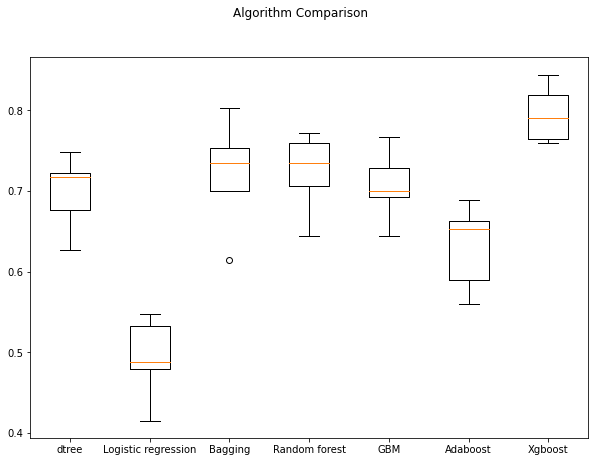

<IPython.core.display.Javascript object>

In [28]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- From the chart we will pick 4 models that performed well for further hyperparameter tuning;
    - Decision Tree
    - Bagging
    - Random  Forest
    - XGBoost

### Model Building with Oversampled data


In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



<IPython.core.display.Javascript object>

In [30]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.9720494245534969
Logistic regression: 0.883963699328486
Bagging: 0.9762141471581656
Random forest: 0.9839075260047615
GBM: 0.9256068151319724
Adaboost: 0.8978689011775473
Xgboost: 0.989554053559209

Validation Performance:

dtree: 0.7769784172661871
Logistic regression: 0.8489208633093526
Bagging: 0.8345323741007195
Random forest: 0.8489208633093526
GBM: 0.8776978417266187
Adaboost: 0.8561151079136691
Xgboost: 0.8669064748201439


<IPython.core.display.Javascript object>

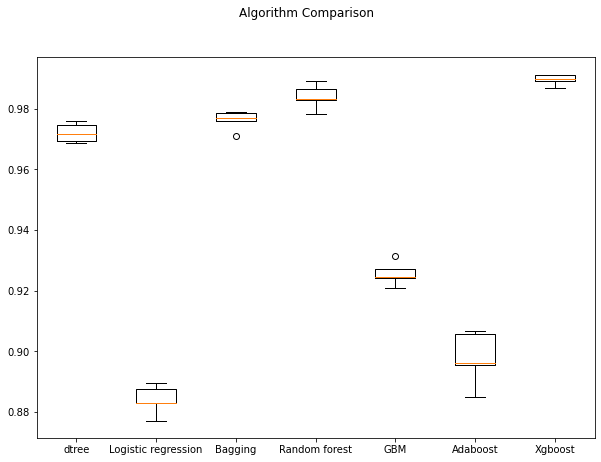

<IPython.core.display.Javascript object>

In [31]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- From the chart we will pick 4 models that performed well for further hyperparameter tuning, this is the same in the original data performance: Decision Tree, Bagging, Random  Forest and XGBoost

### Model Building with Undersampled data

In [32]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



<IPython.core.display.Javascript object>

In [33]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8617776495202367
Logistic regression: 0.8726138085275232
Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
GBM: 0.8978572974532861
Adaboost: 0.8666113556020489
Xgboost: 0.9074742082100858

Validation Performance:

dtree: 0.841726618705036
Logistic regression: 0.8525179856115108
Bagging: 0.8705035971223022
Random forest: 0.8920863309352518
GBM: 0.8884892086330936
Adaboost: 0.8489208633093526
Xgboost: 0.9028776978417267


<IPython.core.display.Javascript object>

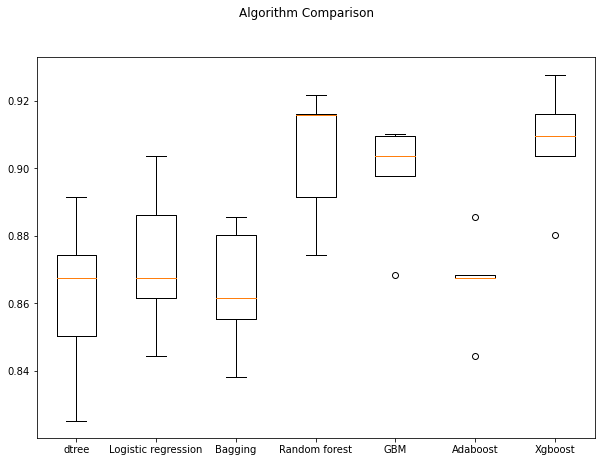

<IPython.core.display.Javascript object>

In [34]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- To maintain the same best models from original and oversampling we will use Decision Tree, Bagging, Random  Forest and XGBoost for Hyperparameter tuning

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Decision tree with original data

In [35]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5684366207344347:


<IPython.core.display.Javascript object>

In [36]:
# building model with best parameters
dt_orig = DecisionTreeClassifier(
    random_state=1,
    max_depth=5,
    min_samples_leaf=7,
    max_leaf_nodes=15,
    min_impurity_decrease=0.0001,
)


# Fit the model on training data
dt_orig.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

<IPython.core.display.Javascript object>

In [37]:
dt_train_orig = model_performance_classification_sklearn(dt_orig, X_train, y_train)
dt_train_orig

,Accuracy,Recall,Precision,F1
0,0.974,0.591,0.904,0.715


<IPython.core.display.Javascript object>

In [38]:
dt_val_orig = model_performance_classification_sklearn(dt_orig, X_val, y_val)
dt_val_orig

,Accuracy,Recall,Precision,F1
0,0.970,0.583,0.822,0.682


<IPython.core.display.Javascript object>

- the model is performing poorly on both train and validation dataset using Recall as the parameter to score performance of models

### Decision tree with oversampled data

In [39]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9102913265648006:


<IPython.core.display.Javascript object>

In [40]:
# building model with best parameters
dt_ov = DecisionTreeClassifier(
    random_state=1,
    max_depth=3,
    min_samples_leaf=7,
    max_leaf_nodes=15,
    min_impurity_decrease=0.001,
)

# Fit the model on training data
dt_ov.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

<IPython.core.display.Javascript object>

In [41]:
dt_train_ov = model_performance_classification_sklearn(
    dt_ov, X_train_over, y_train_over
)
dt_train_ov

,Accuracy,Recall,Precision,F1
0,0.843,0.917,0.799,0.854


<IPython.core.display.Javascript object>

In [42]:
dt_val_ov = model_performance_classification_sklearn(dt_ov, X_val, y_val)
dt_val_ov

,Accuracy,Recall,Precision,F1
0,0.763,0.885,0.176,0.294


<IPython.core.display.Javascript object>

- From Recall, there is overfitting in the train data set, though Precision and F1 score has poor perfomance in validation dataset

### Decision tree with undersampled data

In [43]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 20),
    "min_samples_leaf": [1, 2, 5, 7],
    "max_leaf_nodes": [5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.850811629752543:


<IPython.core.display.Javascript object>

In [44]:
# building model with best parameters
dt_un = DecisionTreeClassifier(
    random_state=1,
    max_depth=2,
    min_samples_leaf=1,
    max_leaf_nodes=5,
    min_impurity_decrease=0.001,
)


# Fit the model on training data
dt_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

In [45]:
dt_train_un = model_performance_classification_sklearn(dt_un, X_train_un, y_train_un)
dt_train_un

,Accuracy,Recall,Precision,F1
0,0.764,0.909,0.705,0.794


<IPython.core.display.Javascript object>

In [46]:
dt_val_un = model_performance_classification_sklearn(dt_un, X_val, y_val)
dt_val_un

,Accuracy,Recall,Precision,F1
0,0.609,0.888,0.114,0.202


<IPython.core.display.Javascript object>

- model is performing well in Recall

### Bagging with original data

In [47]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.7308563595700166:


<IPython.core.display.Javascript object>

In [48]:
# building model with best parameters
bag_orig = BaggingClassifier(
    random_state=1, n_estimators=70, max_samples=0.8, max_features=0.9
)

# Fit the model on training data
bag_orig.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=70,
                  random_state=1)

<IPython.core.display.Javascript object>

In [49]:
bag_train_orig = model_performance_classification_sklearn(bag_orig, X_train, y_train)
bag_train_orig

,Accuracy,Recall,Precision,F1
0,0.999,0.978,1.000,0.989


<IPython.core.display.Javascript object>

In [50]:
bag_val_orig = model_performance_classification_sklearn(bag_orig, X_val, y_val)
bag_val_orig

,Accuracy,Recall,Precision,F1
0,0.984,0.737,0.958,0.833


<IPython.core.display.Javascript object>

- There is a slight overfitting in Recall

### Bagging with oversampled data

In [51]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9828488269988673:


<IPython.core.display.Javascript object>

In [52]:
# building model with best parameters
bag_ov = BaggingClassifier(
    random_state=1, n_estimators=70, max_samples=0.9, max_features=0.8
)

# Fit the model on training data
bag_ov.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70,
                  random_state=1)

<IPython.core.display.Javascript object>

In [53]:
bag_train_ov = model_performance_classification_sklearn(
    bag_ov, X_train_over, y_train_over
)
bag_train_ov

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [54]:
bag_val_ov = model_performance_classification_sklearn(bag_ov, X_val, y_val)
bag_val_ov

,Accuracy,Recall,Precision,F1
0,0.986,0.867,0.883,0.875


<IPython.core.display.Javascript object>

- There is overfitting in the train model

### Bagging with undersampled data

In [55]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8966236202294207:


<IPython.core.display.Javascript object>

In [56]:
# building model with best parameters
bag_un = BaggingClassifier(
    random_state=1, n_estimators=70, max_samples=0.9, max_features=0.9
)

# Fit the model on training data
bag_un.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

<IPython.core.display.Javascript object>

In [57]:
bag_train_un = model_performance_classification_sklearn(bag_un, X_train_un, y_train_un)
bag_train_un

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [58]:
bag_val_un = model_performance_classification_sklearn(bag_un, X_val, y_val)
bag_val_un

,Accuracy,Recall,Precision,F1
0,0.938,0.896,0.469,0.616


<IPython.core.display.Javascript object>

- There is also overfitting in the train model

### RandomForest with original data

In [59]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6996248466921577:


<IPython.core.display.Javascript object>

In [60]:
# building model with best parameters
rf_orig = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt",
)

# Fit the model on training data
rf_orig.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

<IPython.core.display.Javascript object>

In [61]:
rf_train_orig = model_performance_classification_sklearn(rf_orig, X_train, y_train)
rf_train_orig

,Accuracy,Recall,Precision,F1
0,0.995,0.909,1.000,0.952


<IPython.core.display.Javascript object>

In [62]:
rf_val_orig = model_performance_classification_sklearn(rf_orig, X_val, y_val)
rf_val_orig

,Accuracy,Recall,Precision,F1
0,0.983,0.712,0.985,0.827


<IPython.core.display.Javascript object>

- There is overfitting in Recall parameter, others parameters are fitting well

### RandomForest with oversampled data

In [63]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9815078165615898:


<IPython.core.display.Javascript object>

In [64]:
# building model with best parameters
rf_ov = RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt",
)
# Fit the model on training data
rf_ov.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

<IPython.core.display.Javascript object>

In [65]:
rf_train_ov = model_performance_classification_sklearn(
    rf_ov, X_train_over, y_train_over
)
rf_train_ov

,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


<IPython.core.display.Javascript object>

In [66]:
rf_val_ov = model_performance_classification_sklearn(rf_ov, X_val, y_val)
rf_val_ov

,Accuracy,Recall,Precision,F1
0,0.988,0.860,0.926,0.892


<IPython.core.display.Javascript object>

- There is also overfitting in Recall, other parameters are peforming well

### RandomForest with undersampled data

In [67]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8978140105331505:


<IPython.core.display.Javascript object>

In [68]:
# building model with best parameters
rf_un = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt",
)


# Fit the model on training data
rf_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

<IPython.core.display.Javascript object>

In [69]:
rf_train_un = model_performance_classification_sklearn(rf_un, X_train_un, y_train_un)
rf_train_un

,Accuracy,Recall,Precision,F1
0,0.988,0.977,0.999,0.988


<IPython.core.display.Javascript object>

In [70]:
rf_val_un = model_performance_classification_sklearn(rf_un, X_val, y_val)
rf_val_un

,Accuracy,Recall,Precision,F1
0,0.944,0.885,0.496,0.636


<IPython.core.display.Javascript object>

- There is overfitting in Recall, other parameters Precission and F1 score are performing poorly

### XGBoost with original data

In [71]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.8570088738186279:


<IPython.core.display.Javascript object>

In [72]:
# building model with best parameters
xgb_orig = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=150,
    learning_rate=0.1,
    gamma=3,
)

# Fit the model on training data
xgb_orig.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [73]:
xgb_train_orig = model_performance_classification_sklearn(xgb_orig, X_train, y_train)
xgb_train_orig

,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.988,0.994


<IPython.core.display.Javascript object>

In [74]:
xgb_val_orig = model_performance_classification_sklearn(xgb_orig, X_val, y_val)
xgb_val_orig

,Accuracy,Recall,Precision,F1
0,0.989,0.849,0.948,0.896


<IPython.core.display.Javascript object>

- There is overfitting in Recall parameter

### XGBoost with oversampled data

In [75]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.9956240108948847:


<IPython.core.display.Javascript object>

In [76]:
# building model with best parameters
xgb_ov = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.2,
    gamma=0,
)

# Fit the model on training data
xgb_ov.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [77]:
xgb_train_ov = model_performance_classification_sklearn(
    xgb_ov, X_train_over, y_train_over
)
xgb_train_ov

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [78]:
xgb_val_ov = model_performance_classification_sklearn(xgb_ov, X_val, y_val)
xgb_val_ov

,Accuracy,Recall,Precision,F1
0,0.985,0.874,0.859,0.866


<IPython.core.display.Javascript object>

- There is overffitting in the model

### XGBoost with undersampled data

In [79]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9266503138301709:


<IPython.core.display.Javascript object>

In [80]:
# building model with best parameters
xgb_un = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5,
)

# Fit the model on training data
xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [81]:
xgb_train_un = model_performance_classification_sklearn(xgb_un, X_train_un, y_train_un)
xgb_train_un

,Accuracy,Recall,Precision,F1
0,0.990,1.000,0.981,0.990


<IPython.core.display.Javascript object>

In [82]:
xgb_val_un = model_performance_classification_sklearn(xgb_un, X_val, y_val)
xgb_val_un

,Accuracy,Recall,Precision,F1
0,0.863,0.910,0.277,0.424


<IPython.core.display.Javascript object>

- Model is performing well in Recall

## Model performance comparison and choosing the final model

In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dt_train_orig.T,
        dt_train_ov.T,
        dt_train_un.T,
        bag_train_orig.T,
        bag_train_ov.T,
        bag_train_un.T,
        rf_train_orig.T,
        rf_train_ov.T,
        rf_train_un.T,
        xgb_train_orig.T,
        xgb_train_ov.T,
        xgb_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree tuned with Original data",
    "Decision Tree tuned with oversampled data",
    "Decision Tree tuned with undersampled data",
    "Bagging tuned with Original data",
    "Bagging tuned with oversampled data",
    "Bagging tuned with undersampled data",
    "Random Forest tuned with Original data",
    "Random Forest tuned with oversampled data",
    "Random Forest tuned with undersampled data",
    "XGBoost tuned with Original data",
    "XGBoost tuned with oversampled data",
    "XGBoost tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree tuned with Original data,Decision Tree tuned with oversampled data,Decision Tree tuned with undersampled data,Bagging tuned with Original data,Bagging tuned with oversampled data,Bagging tuned with undersampled data,Random Forest tuned with Original data,Random Forest tuned with oversampled data,Random Forest tuned with undersampled data,XGBoost tuned with Original data,XGBoost tuned with oversampled data,XGBoost tuned with undersampled data
Accuracy,0.974,0.843,0.764,0.999,1.000,1.000,0.995,1.000,0.988,0.999,1.000,0.990
Recall,0.591,0.917,0.909,0.978,1.000,1.000,0.909,0.999,0.977,1.000,1.000,1.000
Precision,0.904,0.799,0.705,1.000,1.000,1.000,1.000,1.000,0.999,0.988,1.000,0.981
F1,0.715,0.854,0.794,0.989,1.000,1.000,0.952,1.000,0.988,0.994,1.000,0.990


<IPython.core.display.Javascript object>

In [84]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        dt_val_orig.T,
        dt_val_ov.T,
        dt_val_un.T,
        bag_val_orig.T,
        bag_val_ov.T,
        bag_val_un.T,
        rf_val_orig.T,
        rf_val_ov.T,
        rf_val_un.T,
        xgb_val_orig.T,
        xgb_val_ov.T,
        xgb_val_un.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree validation tuned with Original data",
    "Decision Tree validation tuned with oversampled data",
    "Decision Tree validation tuned with undersampled data",
    "Bagging validation tuned with Original data",
    "Bagging validation tuned with oversampled data",
    "Bagging validation tuned with undersampled data",
    "Random Forest validation tuned with Original data",
    "Random Forest validation tuned with oversampled data",
    "Random Forest validation tuned with undersampled data",
    "XGBoost validation tuned with Original data",
    "XGBoost validation tuned with oversampled data",
    "XGBoost validation tuned with undersampled data",
]


print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree validation tuned with Original data,Decision Tree validation tuned with oversampled data,Decision Tree validation tuned with undersampled data,Bagging validation tuned with Original data,Bagging validation tuned with oversampled data,Bagging validation tuned with undersampled data,Random Forest validation tuned with Original data,Random Forest validation tuned with oversampled data,Random Forest validation tuned with undersampled data,XGBoost validation tuned with Original data,XGBoost validation tuned with oversampled data,XGBoost validation tuned with undersampled data
Accuracy,0.970,0.763,0.609,0.984,0.986,0.938,0.983,0.988,0.944,0.989,0.985,0.863
Recall,0.583,0.885,0.888,0.737,0.867,0.896,0.712,0.860,0.885,0.849,0.874,0.910
Precision,0.822,0.176,0.114,0.958,0.883,0.469,0.985,0.926,0.496,0.948,0.859,0.277
F1,0.682,0.294,0.202,0.833,0.875,0.616,0.827,0.892,0.636,0.896,0.866,0.424


<IPython.core.display.Javascript object>

- The best model that has a good Recall in the train and validation set is Decision Tree Undersampling model

### Test set final performance

In [85]:
# Using Decision tree undersampled to model
test_dt = model_performance_classification_sklearn(dt_un, X_test, y_test)
test_dt

,Accuracy,Recall,Precision,F1
0,0.633,0.876,0.121,0.212


<IPython.core.display.Javascript object>

- The model Decision Tree undersampling is performing well on the test data set

### Feature Importances

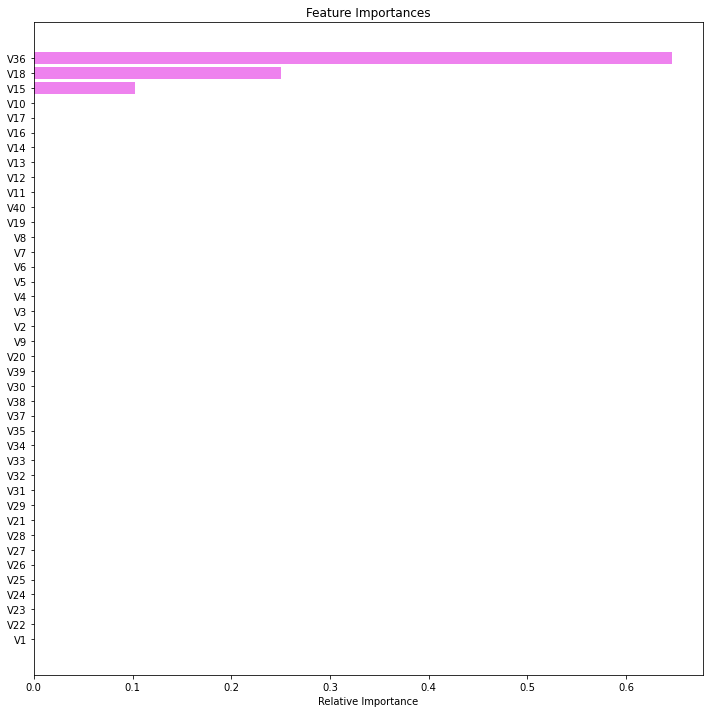

<IPython.core.display.Javascript object>

In [86]:
feature_names = X_train.columns
importances = dt_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important features are V36, V18 and V15

## Pipelines to build the final model


- Since we have only one datatype in the data, we don't need to use column transformer here

In [87]:
Pipeline_model = Pipeline(
    [
        ("scaler", StandardScaler()),
        "DecisionTree",
        DecisionTreeClassifier(
            random_state=1,
            max_depth=2,
            min_samples_leaf=1,
            max_leaf_nodes=4,
            min_impurity_decrease=0.01,
        ),
    ]
)

<IPython.core.display.Javascript object>

In [88]:
# Separating target variable and other variables
X1 = data_train.drop(columns="Target")
Y1 = data_train["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = data_test.drop(["Target"], axis=1)
y_test1 = data_test["Target"]

<IPython.core.display.Javascript object>

In [89]:
# We can't oversample/undersample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# We don't need to impute missing values in test set as it will be done inside pipeline

<IPython.core.display.Javascript object>

In [90]:
# code for undersampling on the data
# Under Sampling Technique
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [91]:
# Pipeline_model.fit(X_train_un, y_train_un)

<IPython.core.display.Javascript object>

In [92]:
# Pipeline_model_test = model_performance_classification_sklearn(
#    Pipeline_model, X_test1, y_test1)
# Pipeline_model_test

<IPython.core.display.Javascript object>

# Business Insights and Conclusions

### INSIGHTS

- From the model, values in the column V36, V18 and V15 respectively are important features in the data
- From test dataset, the model can rightly predict when a generator is due for inspection

### CONCLUSIONS

- A more detailed information of the different columns will enable one to give an accurate recommendations to the company
- ReneWind shouild focus on the values in column V36, V18 and V15 as these will determine when the generators need servicing to avoid replacements which costs more

***